# Problem Three
*In the directed search model with incomplete infromation, use the jupyter-notebook (if you need it) and prove theoretically that if there is an equilibrium in firms' wages, and the revenue of firm 1 is strictly larger than firm 2, then in the equilibrium firm 1 must set a strictly higher wage than firm 2 and that the wage that firm 1 sets will be such that $\lambda w_1 + (1-\lambda) \leq w_2$. Use octave (or sagemath if you can figure out how to do it) to compute the equilibrium in firms wages numerically.*

### General Plan
#### Assume
- firms are in equilibirum in wages
- revenue of firm 1 ( $\Pi _1$) is strictly larger than revenue of firm 2 ( $\Pi _2$)
    - that is, $\Pi _1 > \Pi _2$

#### Want to Show
- firm 1's wage ( $w_1$) is strictly higher than firm 2's ( $w_2$)
    - that is, $w_1 > w_2$
- firm 1's wage is such that $\lambda w_1 + (1-\lambda) \leq w_2$ where $\lambda$ is the probability with which a worker applies to firm 1

#### Plan
- establish correct payoff functions
- figure out worker responses and behaviour in equlibirum
- show that if $w_2 > w_1$ then the equlibirium cannot hold
- assume $w_1 > w_2$, and show that if $\lambda w_1 + (1-\lambda) \geq w_2$, then the eqilibirium cannot hold

## Correct Payoff Functions

### Setup
We have two workers, $W_1$ and $W_2$, they can each be one of two types, high ($h$) or low ($l$)\
There are two firms, $F_1$ and $F_2$ which offer wages $w_1$ and $w_2$ respectively.\
$\lambda$ (denoted $\gamma$ in the code) is the probability of a worker being the high type.\
Let $\pi_t$ be the probability with which worker of type $t$ ($t = h, l$) chooses to apply to firm 1.\
Let $P_i$ be the expected payoff for worker $i$
Initially we assume nothing about the relationship of $w_1$ and $w_2$ but we do assume in equilibrium that firm 1's revenue ($\Pi_1$) is greater than firm 2's ($\Pi_2$).

If only one worker (eg worker $i$) applies to a firm, they will be hired and paid that firm's wage. If two workers apply to the same firm the firm will choose the worker of the higher type who will be hired and paid the wage while the other worker recieves no pay. If the workers are of the same type, the firm will choose each worker with probability $\frac{1}{2}$ such that the workers expected payoff for applying to firm $k$ ($k = 1,2$) is $P_i = \frac{w_k}{2}$.

## Small wage difference

### Potential Payoffs for High-Type Worker $i$
Let worker $i$ be a high type.

If worker $i$ **applies to firm 1**, then we can assume worker $j$ ($j \neq i$) applies to firm 1 (the same firm) or applies to firm 2 (the other firm).\
If worker $j$ is also a high type (probability $\lambda$) they apply to firm 1 with probability $\pi_h$ and if they are a low type (probability $1-\lambda$) they apply to firm 1 with probability ($\pi_l$).

So if worker $j$ is a high type, worker $i$'s expected payoff is:
\begin{aligned}
P_i(F_1,t_j=h) &= \pi_h (\frac{w_1}{2}) + (1-\pi_h)w_1
\end{aligned}

If worker $j$ is a low type, worker $i$'s expected payoff is:
\begin{aligned}
P_i(F_1,t_j=l) &= \pi_l(w_1) + (1-\pi_l)w_1\\
&= w_1
\end{aligned}

Then the expected payoff for worker $i$ of applying to firm 1 is:\
\begin{aligned}
P_i (F_1) &= \lambda P_i(F_1,t_j=h) + (1-\lambda)P_i(F_1,t_j=l)\\
&= \lambda\{\pi_h (\frac{w_1}{2}) + (1-\pi_h)w_1\} + (1-\lambda)\{w_1\}
\end{aligned}

If worker $i$ **applies to firm 2**, then we can assume worker $j$ applies to firm 1 (the other firm) or applies to firm 2 (the same firm).\
If worker $j$ is also a high type (probability $\lambda$) they apply to firm 1 with probability $\pi_h$ and if they are a low type (probability $1-\lambda$) they apply to firm 1 with probability ($\pi_l$).

If worker $j$ is a high type, worker $i$'s expected payoff is:
\begin{aligned}
P_i(F_2,t_j=h) &= \pi_h (w_2) + (1-\pi_h)(\frac{w_2}{2})
\end{aligned}

If worker $j$ is a low type, worker $i$'s expected payoff is:
\begin{aligned}
P_i(F_2,t_j=l) &= \pi_l(w_2) + (1-\pi_l)(w_2)\\
&= w_2
\end{aligned}

Then the expected payoff for worker $i$ of applying to firm 2 is:
\begin{aligned}
P_i (F_1) &= \lambda P_i(F_2,t_j=h) + (1-\lambda)P_i(F_2,t_j=l)\\
&= \lambda\{\pi_h (w_2) + (1-\pi_h)(\frac{w_2}{2})\} + (1-\lambda)\{w_2\}
\end{aligned}

So for worker $i$ to be indifferent we must have:
\begin{aligned}
P_i (F_1) &= P_i(F_2)\\
\lambda\{\pi_h (\frac{w_1}{2}) + (1-\pi_h)w_1\} + (1-\lambda)\{w_1\} &= \lambda\{\pi_h (w_2) + (1-\pi_h)(\frac{w_2}{2})\} + (1-\lambda)\{w_2\}
\end{aligned}

In [1]:
var('gamma, pi_h, w_1, w_2')
PHF1 = gamma*(pi_h*(w_1/2)+(1-pi_h)*w_1)+(1-gamma)*w_1
PHF2 = gamma*(pi_h*w_2+(1-pi_h)*(w_2/2))+(1-gamma)*w_2
pi_h_star = solve(PHF1 == PHF2, pi_h)
pi_h_star

[pi_h == ((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2)]

So we find for worker $i$ of type $h$ to be indifferent between the two firms, workers of type $h$ must choose firm 1 with probability:\
$\pi_h^* = \frac{(\lambda-2)w_2 + 2w_1}{\lambda(w_1 + w_2)}$

We check this equation by setting $w_1 = w_2 = w$ (we expect an answer of $\frac{1}{2}$ when the wages are equal, as shown in class).

In [2]:
var('w')
check = solve(pi_h == (((gamma - 2)*w + 2*w)/(gamma*w + gamma*w)), pi_h)
show(check)

[pi_h == (1/2)]

So the equation behaves as expected.

Now we do the same for a player of a low type.

### Potential Payoffs for Low-Type Worker $i$
Let worker $i$ be a low type.

If worker $i$ **applies to firm 1**, then we can assume worker $j$ ($j \neq i$) applies to firm 1 (the same firm) or applies to firm 2 (the other firm).\
If worker $j$ is also a low type (probability $1-\lambda$) they apply to firm 1 with probability $\pi_l$ and if they are a high type (probability $\lambda$) they apply to firm 1 with probability ($\pi_h$).

So if worker $j$ is a low type, worker $i$'s expected payoff is:
\begin{aligned}
P_i(F_1,t_j=l) &= \pi_l(\frac{w_1}{2}) + (1-\pi_l)w_1\\
&= \pi_l(\frac{w_1}{2}) + w_1 -\pi_lw_1\\
&= w_1 - \pi_l(\frac{w_1}{2})
\end{aligned}

If worker $j$ is a high type, worker $i$'s expected payoff is:
\begin{aligned}
P_i(F_1,t_j=h) &= \pi_h (0) + (1-\pi_h)w_1\\
&= (1-\pi_h)w_1
\end{aligned}

Then the expected payoff for worker $i$ of applying to firm 1 is:\
\begin{aligned}
P_i (F_1) &= \lambda P_i(F_1,t_j=h) + (1-\lambda)P_i(F_1,t_j=l)\\
&= \lambda\{(1-\pi_h)w_1\} + (1-\lambda)\{w_1 - \pi_l(\frac{w_1}{2})\}
\end{aligned}

If worker $i$ **applies to firm 2**, then we can assume worker $j$ ($j \neq i$) applies to firm 1 (the other firm) or applies to firm 2 (the same firm).\
If worker $j$ is also a low type (probability $1-\lambda$) they apply to firm 1 with probability $\pi_l$ and if they are a high type (probability $\lambda$) they apply to firm 1 with probability ($\pi_h$).

So if worker $j$ is a low type, worker $i$'s expected payoff is:
\begin{aligned}
P_i(F_2,t_j=l) &= \pi_l(w_2) + (1-\pi_l)(\frac{w_2}{2})
\end{aligned}

If worker $j$ is a high type, worker $i$'s expected payoff is:
\begin{aligned}
P_i(F_2,t_j=h) &= \pi_h (w_2) + (1-\pi_h) (0)\\
&= \pi_hw_2
\end{aligned}

Then the expected payoff for worker $i$ of applying to firm 2 is:\
\begin{aligned}
P_i (F_2) &= \lambda P_i(F_2,t_j=h) + (1-\lambda)P_i(F_2,t_j=l)\\
&= \lambda\{\pi_hw_2\} + (1-\lambda)\{\pi_l(w_2) + (1-\pi_l)(\frac{w_2}{2})\}
\end{aligned}

So for worker $i$ to be indifferent we must have:
\begin{aligned}
P_i (F_1) &= P_i(F_2)\\
\lambda\{(1-\pi_h)w_1\} + (1-\lambda)\{w_1 - \pi_l(\frac{w_1}{2})\} &= \lambda\{\pi_hw_2\} + (1-\lambda)\{\pi_l(w_2) + (1-\pi_l)(\frac{w_2}{2})\}
\end{aligned}

In [3]:
var('pi_l')
PLF1 = gamma*((1-pi_h)*w_1)+(1-gamma)*(w_1 - pi_l*(w_1/2))
PLF2 = gamma*(pi_h*w_2)+(1-gamma)*(pi_l*w_2+(1-pi_l)*(w_2/2))
pi_l_star = solve(PLF1 == PLF2, pi_l)
pi_l_star

[pi_l == (2*(gamma*pi_h - 1)*w_1 + (2*gamma*pi_h - gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2)]

So we find for worker $i$ of type $l$ to be indifferent between the two firms, workers of type $l$ must choose firm 1 with probability:\
\begin{aligned}
\pi_l^* &= \frac{2(\lambda \pi_h - 1)w_1 + (2\lambda \pi_h - \lambda + 1)w_2}{(\lambda - 1)w_1 + (\lambda - 1)w_2}\\
&= \frac{2(\lambda \pi_h - 1)w_1 + (\lambda(2\pi_h - 1) + 1)w_2}{(\lambda - 1)(w_1 + w_2)} 
\end{aligned}
As above, we check this equation by setting $w_1 = w_2 = w$ and $\pi_h = 1/2$ (we expect an answer of $\frac{1}{2}$ when the wages are equal, as above).

In [4]:
var('w')
check = solve([pi_l == (2*(gamma*pi_h - 1)*w + (2*gamma*pi_h - gamma + 1)*w)/((gamma - 1)*w + (gamma - 1)*w), pi_h == 1/2], pi_l, pi_h)
show(check)

[[pi_l == (1/2), pi_h == (1/2)]]

So, as for the high-type worker, the equation behaves as expected.

### Payoff for Large Wage Difference 
As discussed in class, if there is a large enough disparity between the wages a high type worker will only apply to the firm with the higher wage. As we don't know which wage is higher this gives us two possibilities:

#### When Wage 1 is greater
Assume wage 1 is greater than wage 2. For a high type worker $i$, the potential payoff from applying to firm 1 (since we assume if worker $j$ is a high type they will apply to firm 1) is:
\begin{aligned}
P_i (F_1) &= \lambda (\frac{w_1}{2}) + (1-\lambda)(w_1)\\
&= w_1(\frac{\lambda}{2} + 1 - \lambda)\\
&= w_1 (1 - \frac{\lambda}{2})
\end{aligned}

The payoff from applying to firm 2 (knowing only low type workers will apply to firm 2) is:
\begin{aligned}
P_i (F_2) &= \lambda (w_2) + (1-\lambda)(w_2)\\
&= w_2
\end{aligned}

So for a high type worker to always apply to firm 1 we would need:
\begin{aligned}
P_i (F_1) &\geq P_i (F_2)\\
w_1 (1 - \frac{\lambda}{2}) &\geq w_2
\end{aligned}

If a low type worker always applied to firm 1 as well, then the payoff of a low type worker $j$ applying to firm 1 would be:
\begin{aligned}
P_j (F_1) &= \lambda (0) + (1-\lambda)(\frac{w_1}{2})\\
&= (1-\lambda)(\frac{w_1}{2})\\
&= w_1(\frac{1-\lambda}{2})
\end{aligned}

And if they deviated and applied to firm 2, their payoff would be:
\begin{aligned}
P_j (F_2) &= \lambda (w_2) + (1-\lambda)w_2\\
&= w_2
\end{aligned}

So for a low type worker to **not** always apply to firm 1 we would need:
\begin{aligned}
P_j (F_1) &\leq P_j (F_2)\\
w_1(\frac{1-\lambda}{2}) &\leq w_2
\end{aligned}

Thus, assuming $w_1 (1 - \frac{\lambda}{2}) \geq w_2$ and $(1-\lambda)(\frac{w_1}{2}) \leq w_2$, we can assume a low type worker would apply to firm 1 with probability $\pi_1$.

If worker $i$ is a high type, then a low-type worker $j$'s expected profit of applying to firm 1 would be:
\begin{aligned}
P_j (F_1, t_i = h) &= 0
\end{aligned}

If worker $i$ is a low type, then worker $j$'s expected profit of applying to firm 1 would be:
\begin{aligned}
P_j (F_1, t_i = l) &= \pi_1(\frac{w_1}{2}) + (1-\pi_1)(w_1)
\end{aligned}

Then the expected payoff for worker $j$ in **applying to firm 1** would be:
\begin{aligned}
P_j(F_1) &= \lambda P_j (F_1, t_i = h) + (1-\lambda)P_j (F_1, t_i = l)\\
&= \lambda \{0\} + (1-\lambda)\{\pi_1(\frac{w_1}{2} + (1-\pi_1)(w_1)\}\\
&= (1-\lambda)\{\pi_1(\frac{w_1}{2} + (1-\pi_1)w_1\}\\
&= w_1\{(1-\lambda)\frac{pi_1}{2} + 1 - \pi_1\}\\
&= w_1\{(1-\lambda)\frac{pi_1}{2} + 1 - \pi_1\}\\
&= w_1(1-\lambda)(1 - \frac{\pi_1}{2})
\end{aligned}

If worker $i$ is a high type, then worker $j$'s expected profit of applying to firm 2 would be:
\begin{aligned}
P_j (F_2, t_i = h) &= w_2
\end{aligned}

If worker $i$ is a low type, then worker $j$'s expected profit of applying to firm 2 would be:
\begin{aligned}
P_j (F_2, t_i = l) &= \pi_1(w_2) + (1-\pi_1)(\frac{w_2}{2})
\end{aligned}

Then the expected payoff for worker $j$ in **applying to firm 2** would be:
\begin{aligned}
P_j(F_2) &= \lambda P_j (F_2, t_i = h) + (1-\lambda)P_j (F_2, t_i = l)\\
&= \lambda \{w_2\} + (1-\lambda)\{\pi_1(w_2) + (1-\pi_1)(\frac{w_2}{2})\}\\
&= \frac{w_2}{2}\{2\lambda + (1-\lambda)(\pi_1 + 1)\}
\end{aligned}

So in order for a low-type worker, $j$, to be indifferent between the two firms we must have:
\begin{aligned}
P_j(F_1) &= P_j(F_2)\\
w_1(1-\lambda)(1 - \frac{\pi_1}{2}) &= \frac{w_2}{2}\{2\lambda + (1-\lambda)(\pi_1 + 1)\}
\end{aligned}

In [5]:
var('pi_1')
P_1F1 = w_1*(1-gamma)*(1-(pi_1/2))
P_1F2 = (w_2/2)*(2*gamma + ((1-gamma)*(pi_1+1)))
pi_1_star = solve(P_1F1 == P_1F2, pi_1)
pi_1_star

[pi_1 == (2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2)]

In [6]:
bool([(2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2)] == [(2*(1 - gamma)*w_1 - w_2*(1+gamma))/((1-gamma)*(w_1+w_2))])

True

So we find for worker $j$ of type $l$ to be indifferent between the two firms, workers of type $l$ must choose firm 1 with probability:\
$\pi_1^* = \frac{2 w_1(1 - \lambda) + w_2(1+ \lambda)}{(1 - \lambda)(w_1 + w_2)}$

#### When Wage 2 is greater
Assume wage 2 is greater than wage 1. We use the same approach as above:

For a high type worker $i$, the potential payoff from applying to firm 1 (since we assume if worker $j$ is a high type they will apply to firm 2) is:
\begin{aligned}
P_i (F_1) &= \lambda(w_1) + (1-\lambda)(w_1)\\
&= w_1
\end{aligned}

The payoff from applying to firm 2 (knowing all high type workers will apply to firm 2) is:
\begin{aligned}
P_i (F_2) &= \lambda(\frac{w_2}{2}) + (1-\lambda)(w_2)\\
&= w_2(\frac{\lambda}{2} + 1 - \lambda)\\
&= w_2(1 - \frac{\lambda}{2})
\end{aligned}

So for a high type worker to always apply to firm 2 (that is never apply to firm 1) we would need:
\begin{aligned}
P_i (F_1) &\leq P_i (F_2)\\
w_1 &\leq w_2(1 - \frac{\lambda}{2})
\end{aligned}

If a low type worker also always applied to firm 2, then the payoff of a low type worker $j$ applying to firm 2 would be:
\begin{aligned}
P_j (F_2) &= \lambda (0) + (1-\lambda)(\frac{w_2}{2})\\
&= (1-\lambda)(\frac{w_2}{2})\\
&= w_2 \frac{1-\lambda}{2}\\
\end{aligned}

And deviating and applying to firm 1 would be:
\begin{aligned}
P_j (F_1) &= \lambda (w_1) + (1-\lambda)w_1\\
&= w_1
\end{aligned}

So for a low type worker to **not** always apply to firm 2 we would need:
\begin{aligned}
P_j (F_1) &\geq P_j (F_2)\\
w_1 &\geq w_2 \frac{1-\lambda}{2}
\end{aligned}

Thus, assuming $w_1 \leq w_2(1 - \frac{\lambda}{2})$ and $w_1 \geq w_2 \frac{1-\lambda}{2}$, we can assume a low type worker would apply to firm 1 with probability $\pi_2$.

If worker $i$ is a high type, then low type worker $j$'s expected profit of applying to firm 1 would be:
\begin{aligned}
P_j (F_1, t_i = h) &= w_1
\end{aligned}

If worker $i$ is a low type, then worker $j$'s expected profit of applying to firm 1 would be:
\begin{aligned}
P_j (F_1, t_i = l) &= \pi_2(\frac{w_1}{2}) + (1-\pi_2)(w_1)\\
&= w_1(\frac{\pi_2}{2} + 1 - \pi_2)\\
&= w_1(1 - \frac{\pi_2}{2})
\end{aligned}

Then the expected payoff for worker $j$ in **applying to firm 1** would be:
\begin{aligned}
P_j(F_1) &= \lambda P_j (F_1, t_i = h) + (1-\lambda)P_j (F_1, t_i = l)\\
&= \lambda \{w_1\} + (1-\lambda)\{w_1(1 - \frac{\pi_2}{2})\}\\
&= w_1\{\lambda + (1-\lambda)(1 - \frac{\pi_2}{2})\}
\end{aligned}

If worker $i$ is a high type, then worker $j$'s expected profit of applying to firm 2 would be:
\begin{aligned}
P_j (F_2, t_i = h) &= 0
\end{aligned}

If worker $i$ is a low type, then worker $j$'s expected profit of applying to firm 2 would be:
\begin{aligned}
P_j (F_2, t_i = l) &= \pi_2(w_2) + (1-\pi_2)(\frac{w_2}{2})\\
&= w_2(\pi_2 + \frac{1-\pi_2}{2})\\
&= w_2\frac{2\pi_2 + 1 - pi_2}{2}\\
&= \frac{w_2}{2}(1 + \pi_2)
\end{aligned}

Then the expected payoff for worker $j$ in **applying to firm 2** would be:
\begin{aligned}
P_j(F_2) &= \lambda P_j (F_2, t_i = h) + (1-\lambda)P_j (F_2, t_i = l)\\
&= \lambda \{0\} + (1-\lambda)\{\frac{w_2}{2}(1 + \pi_2)\}\\
&= (1-\lambda)\{\frac{w_2}{2}(1 + \pi_2)\}\\
&= \frac{w_2}{2}\{(1-\lambda)(1 + \pi_2)\}
\end{aligned}

So in order for a low-type worker, $j$, to be indifferent between the two firms we must have:
\begin{aligned}
P_j(F_1) &= P_j(F_2)\\
w_1\{\lambda + (1-\lambda)(1 - \frac{\pi_2}{2})\} &= \frac{w_2}{2}\{(1-\lambda)(1 + \pi_2)\}
\end{aligned}

In [7]:
var('pi_2')
P_2F1 = w_1*(gamma + ((1-gamma)*(1-(pi_2/2))))
P_2F2 = (w_2/2)*((1-gamma)*(1+pi_2))
pi_2_star = solve(P_2F1 == P_2F2, pi_2)
pi_2_star

[pi_2 == -((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)]

So we find for worker $j$ of type $l$ to be indifferent between the two firms, workers of type $l$ must choose firm 1 with probability:\
$\pi_2^* = \frac{2 w_1 - w_2(1-\lambda)}{(1-\lambda)(w_1+w_2)}$

We now have four equations and four unknowns, so we can simultaneously solve them all:

In [8]:
sol = solve((P_1F1 == P_1F2, P_2F1 == P_2F2, PHF1 == PHF2, PLF1 == PLF2), (pi_1, pi_2, pi_h, pi_l))
show(sol)

[[pi_1 == (2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2), pi_2 == -((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2), pi_h == ((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2), pi_l == ((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)]]

In [9]:
pi_1_s = sol[0][0].rhs()
pi_2_s = sol[0][1].rhs()
pi_h_s = sol[0][2].rhs()
pi_l_s = sol[0][3].rhs()

In [10]:
pi_2_s

-((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)

In [11]:
bool([-((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)] == [-((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)])

True

### Strategy Rules
Using all of these equations we can now write out the strategy rules for each type of worker.

**high type worker:**\
$\begin{equation}
  \pi_h(w_1, w_2)=\left\{
  \begin{array}{@{}ll@{}}
    1 & \text{if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2\\
    \frac{{\left(\lambda - 2\right)} w_{2} + 2 \, w_{1}}{\lambda (w_{1} + w_{2})} & \text{if } w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \text{ or } w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1\\
    0 & \text{if } w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
  \end{array}\right.
\end{equation}$

**low type worker:**\
$\begin{equation}
  \pi_l(w_1, w_2)=\left\{
  \begin{array}{@{}ll@{}}
    \frac{2 w_1(\lambda - 1) - w_2(1 + \lambda)}{(1-\lambda)(w_1 + w_2)} & \text{if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2 \\
    \frac{(3-\lambda)w_2-2w_1}{(1-\lambda)(w_1+w_2)} & \text{if } w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \text{ or } w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1 \\
    \frac{2 w_1 - w_2(1-\lambda)}{(1-\lambda)(w_1 + w_2)} & \text{if } w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
  \end{array}\right.
\end{equation}$

### Profit Functions

#### High Type
**Applying to Firm 1**
\begin{aligned}
\Pi_h(F_1) &= \lambda \{\pi_h (\frac{w_1}{2}) + (1-\pi_h)(w_1)\} + (1-\lambda) \{\pi_l (w_1) + (1-\pi_l)(w_1)\\
&= \lambda \{\pi_h (\frac{w_1}{2}) + (1-\pi_h)(w_1)\} + (1-\lambda)(w_1)\\
&= w_1 \{\lambda \{(\frac{\pi_h}{2}) + 1-\pi_h)\} + (1-\lambda)\}\\
&= w_1 \{\lambda (1 -\frac{\pi_h}{2}) + 1 - \lambda \}\\
&= w_1 \{\lambda (1 -\frac{\pi_h}{2} - 1) + 1\}\\
&= w_1 \{1 - \lambda (\frac{\pi_h}{2})\}
\end{aligned}

**Applying to Firm 2**
\begin{aligned}
\Pi_h(F_2) &= \lambda \{\pi_h (w_2) + (1-\pi_h)\frac{w_2}{2}\} + (1-\lambda)(w_2)\\
&= w_2 \{\lambda (\pi_h + \frac{1-\pi_h}{2}) + (1-\lambda)\}\\
&= w_2 \{\frac{\lambda}{2}(\pi_h + 1) + 1 - \lambda\}\\
&= \frac{w_2}{2}\{\lambda \pi_h + \lambda - 2\lambda + 2\}\\
&= \frac{w_2}{2}\{\lambda(\pi_h - 1) + 2\}\\
&= w_2\{\lambda \frac{\pi_h - 1}{2} + 1\}
\end{aligned}

#### Low Type
**Applying to Firm 1**
\begin{aligned}
\Pi_l(F_1) &= \lambda \{\pi_h (0) + (1-\pi_h)(w_1)\} + (1-\lambda) \{\pi_l (\frac{w_1}{2}) + (1-\pi_l)(w_1)\}\\
&= \lambda \{(1-\pi_h)(w_1)\} + (1-\lambda) \{\pi_l (\frac{w_1}{2}) + (1-\pi_l)(w_1)\}\\
&= w_1 \{\lambda (1-\pi_h) + (1-\lambda) \{(\frac{\pi_l}{2}) + (1-\pi_l))\}\}\\
&= w_1 \{\lambda (1-\pi_h) + (1-\lambda) (1 - \frac{\pi_l}{2}) \}
\end{aligned}

**Applying to Firm 2**
\begin{aligned}
\Pi_l(F_2) &= \lambda \{\pi_h (w_2) + (1-\pi_h)(0)\} + (1-\lambda) \{\pi_l (w_2) + (1-\pi_l)\frac{w_2}{2}\}\\
&= w_2 \{\lambda \pi_h + (1-\lambda)(\pi_l + \frac{1-\pi_l}{2})\}\\
&= w_2 \{\lambda \pi_h + (1-\lambda)(2 \pi_l + 1 - \pi_l)\frac{1}{2})\}\\
&= w_2 \{\lambda \pi_h + (1-\lambda)(1 + \pi_l)\frac{1}{2})\}\\
&= w_2 \{\lambda \pi_h + (1-\lambda)\frac{1 + \pi_l}{2})\}
\end{aligned}

With these general profit functions we can now calculate each worker-type's expected profit dependent on the relation of $w_1$ and $w_2$.

We can now check and make sure our found values of $\pi_i, i = \{1, 2, h, l\}$ are behaving as expected.

In [12]:
Profit_h_F1 = w_1*(1-(gamma * (pi_h/2)))
Profit_h_F2 = w_2*(gamma*((pi_h - 1)/2) + 1)
Profit_l_F1 = w_1*((gamma*(1-pi_h)) + ((1-gamma)*(1-(pi_l/2))))
Profit_l_F2 = w_2*((gamma*pi_h) + ((1-gamma)*((1+pi_l)/2)))

In [13]:
Profit_h_F1.subs(pi_h == pi_h_s)

-1/2*(((gamma - 2)*w_2 + 2*w_1)*gamma/(gamma*w_1 + gamma*w_2) - 2)*w_1

In [14]:
Profit_h_F2.subs(pi_h == pi_h_s)

1/2*(gamma*(((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2) - 1) + 2)*w_2

In [15]:
bool([-1/2*(((gamma - 2)*w_2 + 2*w_1)*gamma/(gamma*w_1 + gamma*w_2) - 2)*w_1]==[1/2*(gamma*(((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2) - 1) + 2)*w_2])

True

In [16]:
Profit_l_F1.subs(pi_h == pi_h_s, pi_l == pi_l_s)

-1/2*(2*gamma*(((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2) - 1) - (gamma - 1)*(((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 2))*w_1

In [17]:
Profit_l_F2.subs(pi_h == pi_h_s, pi_l == pi_l_s)

-1/2*((gamma - 1)*(((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 1) - 2*((gamma - 2)*w_2 + 2*w_1)*gamma/(gamma*w_1 + gamma*w_2))*w_2

In [18]:
bool([-1/2*(2*gamma*(((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2) - 1) - (gamma - 1)*(((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 2))*w_1]==[-1/2*((gamma - 1)*(((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 1) - 2*((gamma - 2)*w_2 + 2*w_1)*gamma/(gamma*w_1 + gamma*w_2))*w_2])

True

In [19]:
Profit_h_F1.subs(pi_h == 1)

-1/2*(gamma - 2)*w_1

In [20]:
Profit_h_F2.subs(pi_h == 1)

w_2

In [21]:
Profit_h_F1.subs(pi_h == 0)

w_1

In [22]:
Profit_h_F2.subs(pi_h == 0)

-1/2*(gamma - 2)*w_2

In [23]:
Profit_l_F1.subs(pi_h == 1, pi_l == pi_1_s)

1/2*(gamma - 1)*w_1*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 2)

In [24]:
Profit_l_F2.subs(pi_h == 1, pi_l == pi_1_s)

-1/2*((gamma - 1)*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 1) - 2*gamma)*w_2

In [25]:
bool([1/2*(gamma - 1)*w_1*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 2)]==[-1/2*((gamma - 1)*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 1) - 2*gamma)*w_2])

True

In [26]:
Profit_l_F1.subs(pi_h == 0, pi_l == pi_2_s)

-1/2*((gamma - 1)*(((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 2) - 2*gamma)*w_1

In [27]:
Profit_l_F2.subs(pi_h == 0, pi_l == pi_2_s)

1/2*(gamma - 1)*w_2*(((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 1)

In [28]:
bool([-1/2*((gamma - 1)*(((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 2) - 2*gamma)*w_1]==[1/2*(gamma - 1)*w_2*(((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 1)])

True

In [29]:
bool([1/2*(gamma - 1)*w_1*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 2)] == [-1/2*((gamma - 1)*(((gamma - 1)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 2) - 2*gamma)*w_1])

True

So our profit functions are behaving as expected. We now can solve these profit functions using our found values, $\pi_i$.

For notation purposes, I will refer to each of the possible scenarios as follows:

**Scenario A**
\begin{aligned}
&\lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2\\
&W_h: \pi_h = 1\\
&W_l: \pi_l = \frac{2 w_1(\lambda - 1) - w_2(1+\lambda)}{(1-\lambda)(w_1 + w_2)}
\end{aligned}

**Scenario B**
\begin{aligned}
&w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2\\
&\text{or}\\
&w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1\\
&W_h: \pi_h = \frac{{\left(\lambda - 2\right)} w_{2} + 2 \, w_{1}}{\lambda (w_{1} + w_{2})}\\
&W_l: \pi_l = \frac{(3-\lambda)w_2-2w_1}{(1-\lambda)(w_1+w_2)}
\end{aligned}

**Scenario C**
\begin{aligned}
&w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
&W_h: \pi_h = 0\\
&W_l: \pi_l = \frac{2 w_1 - w_2(1-\lambda)}{(1-\lambda)(w_1 + w_2)}
\end{aligned}

In [30]:
Prof_h_a = Profit_h_F1.subs(pi_h == 1)
Prof_h_b = Profit_h_F1.subs(pi_h == pi_h_s)
Prof_h_c = Profit_h_F1.subs(pi_h == 0)
Prof_l_a = Profit_l_F1.subs(pi_h == 1, pi_l == pi_1_s)
Prof_l_b = Profit_l_F1.subs(pi_h == pi_h_s, pi_l == pi_l_s)
Prof_l_c = Profit_l_F1.subs(pi_h == 0, pi_l == pi_2_s)

So we can now write out the expected profits for each worker type.

**high type worker:**\
$\begin{equation}
  \pi_h(w_1, w_2)=\left\{
  \begin{array}{@{}ll@{}}
    w_1(1 - \frac{\lambda}{2}) & \text{if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2\\
    w_2 \frac{w_1(4-\lambda)}{2(w_1+w_2)} & \text{if } w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \text{ or } w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1\\
    w_2(1 - \frac{\lambda}{2}) & \text{if } w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
  \end{array}\right.
\end{equation}$

**low type worker:**\
$\begin{equation}
  \pi_l(w_1, w_2)=\left\{
  \begin{array}{@{}ll@{}}
    w_1\frac{w_2(3-\lambda)}{2(w_1 + w_2)} & \text{if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2 \\
    w_1\frac{w_2(3-\lambda)}{2(w_1+w_2)} & \text{if } w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \text{ or } w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1 \\
    w_2\frac{w_1(3-\lambda)}{2(w_1+w_2)} & \text{if } w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
  \end{array}\right.
\end{equation}$

## Plotting the Functions

We can set the main function (that is, when there is only a small difference between the two wages) and then use the max_symbolic argument to set the boundaries when the wages become too different.

Let's try setting some values for $\lambda$, $w_1$, and $w_2$.\
First we will fix $\lambda = 0.4$, and $w_2 = 0.5$\
Then we vary the value of $w_1$ from 0 to 1 to satisfy the various scenario ranges.

#### High Type, Strategy Function

In [31]:
strat_h = pi_h_s
strat_h_s = strat_h.subs(gamma == 0.4, w_2 == 0.5)

In [32]:
Prob_h = max_symbolic(0, min_symbolic(strat_h_s, 1))
Prob_h

max(0, min((2*w_1 - 0.800000000000000)/(0.400000000000000*w_1 + 0.200000000000000), 1))

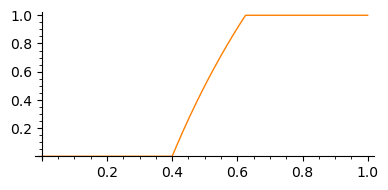

In [33]:
show(plot(Prob_h, 0, 1, figsize=[4,2], color=(1,.5,0) ) )

#### Low Type, Strategy Function

In [34]:
strat_l = pi_l_s
strat_l_s = strat_l.subs(gamma == 0.4, w_2 == 0.5)
strat_l_1 = pi_1_s.subs(gamma == 0.4, w_2 == 0.5)
strat_l_2 = pi_2_s.subs(gamma == 0.4, w_2 == 0.5)
Prob_l = max_symbolic(strat_l_1, min_symbolic(strat_l_s, strat_l_2))
Prob_l

max((-1.20000000000000*w_1 + 0.700000000000000)/(-0.600000000000000*w_1 - 0.300000000000000), min((2*w_1 - 1.30000000000000)/(-0.600000000000000*w_1 - 0.300000000000000), -(2*w_1 - 0.300000000000000)/(-0.600000000000000*w_1 - 0.300000000000000)))

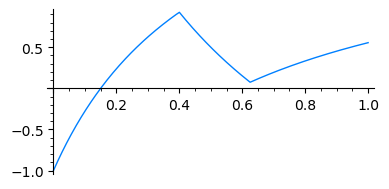

In [35]:
show(plot(Prob_l, 0, 1, figsize=[4,2], color=(0,.5,1) ) )

### Strategy Functions

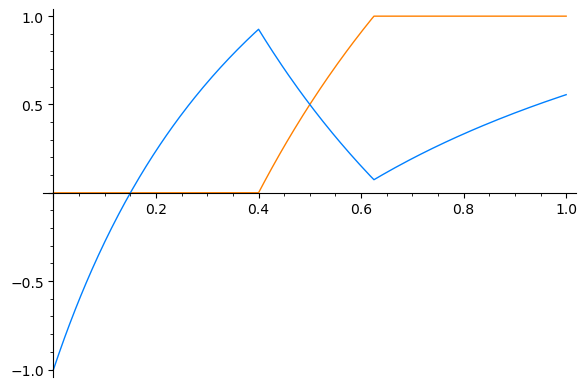

In [36]:
Prob_h_plot = (plot(Prob_h, 0, 1, figsize=[6,4], color=(1,.5,0) ) )
Prob_l_plot = (plot(Prob_l, 0, 1, figsize=[6,4], color=(0,.5,1) ) )
show(Prob_h_plot + Prob_l_plot)

As we can see above, the two functions intersect when $w_1 = 0.5$ at $0.5$ as we would expect, given when the wages are equal $\pi_l = \pi_h = \frac{1}{2} = 0.5$ as was shown at the beginning of this project.

### Payoff Functions

In [37]:
Pay_h_a = Prof_h_a.subs(gamma == 0.4, w_2 == 0.5)
Pay_h_b = Prof_h_b.subs(gamma == 0.4, w_2 == 0.5)
Pay_h_c = Prof_h_c.subs(gamma == 0.4, w_2 == 0.5)
Payoff_h = max_symbolic(Pay_h_a, min_symbolic(Pay_h_b, Pay_h_c))

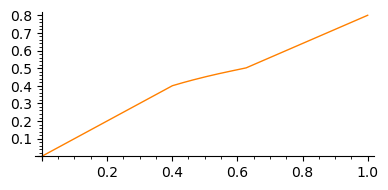

In [38]:
show(plot(Payoff_h, 0, 1, figsize=[4,2], color=(1,.5,0) ) )

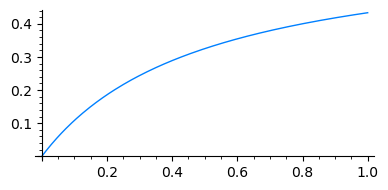

In [39]:
Pay_l_a = Prof_l_a.subs(gamma == 0.4, w_2 == 0.5)
Pay_l_b = Prof_l_b.subs(gamma == 0.4, w_2 == 0.5)
Pay_l_c = Prof_l_c.subs(gamma == 0.4, w_2 == 0.5)
Payoff_l = max_symbolic(Pay_l_c, min_symbolic(Pay_l_b, Pay_l_a))
show(plot(Payoff_l, 0, 1, figsize=[4,2], color=(0,.5,1) ) )

In [40]:
Payoff_h_plot = (plot(Payoff_h, 0, 1, figsize=[6,4], color=(1,.5,0) ) )
Payoff_l_plot = (plot(Payoff_l, 0, 1, figsize=[6,4], color=(0,.5,1) ) )

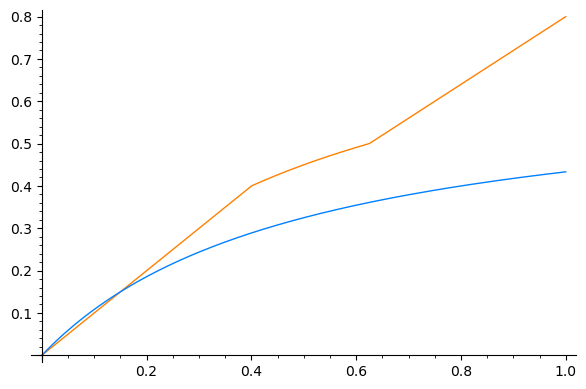

In [41]:
show(Payoff_h_plot + Payoff_l_plot)

## Firm Revenue
We now move on to the firm-side of this problem, beginning by establishing the firms' revenue functions, $\Pi_1, \Pi_2$.

As above we view the problem as three separate scenarios.

**Scenario A**
\begin{aligned}
&\lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2\\
&W_h: \pi_h = 1\\
&W_l: \pi_l = \frac{(2\lambda + 1)w_2 - w_1 - 2}{2(w_2 - w_1)}
\end{aligned}

**Scenario B**
\begin{aligned}
&w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \text{ or }\\ 
&w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1\\
&W_h: \pi_h = \frac{{\left(\lambda - 2\right)} w_{2} + 2 \, w_{1}}{\lambda w_{1} + \lambda w_{2}}\\
&W_l: \pi_l = \frac{(3-\lambda)w_2-2w_1}{(1-\lambda)(w_1+w_2)}
\end{aligned}

**Scenario C**
\begin{aligned}
&w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
&W_h: \pi_h = 0\\
&W_l: \pi_l = \frac{(2\lambda + 1)w_1 - w_2 - 2}{2(w_1 - w_2)}
\end{aligned}

Each firm's expected revenue is dependent on what type of worker they hire (if any) and the wage they pay to that worker. We assume low type workers provide the firm with work/effort equal to $Y > 0$, and high type workers provide the firm with work/effor equal to $\beta Y, \beta>1$

If **firm 1** hires a high type worker, their profit is\
$\hspace{15pt}\Pi_1(t=h)=\beta Y - w_1$\
and if they hire a low type worker their profit is\
$\hspace{15pt}\Pi_1(t=l)=Y-w_1$. 

If **firm 2** hires a high type worker, their profit is\
$\hspace{15pt}\Pi_2(t=h)=\beta Y - w_2$\
and if they hire a low type worker their profit is\
$\hspace{15pt}\Pi_2(t=l)=Y-w_2$.

If either firm hires no one, their profit is zero:\
$\hspace{15pt}\Pi_1(t=none)= \Pi_2(t=none)=0$

If two workers of the same type apply to the same firm, the firm chooses each with probability $\frac{1}{2}$. If two workers of differing types apply, the firm will always hire the high-type worker since $\Pi_i(t=h)>\Pi_i(t=l)$.

We also assume $Y > w_i$ such that if a firm is given a chance to hire any type of worker, they will always choose to do so.

For simplicity, we redue the base profit for either firm, $Y$ to $1$ such that a firm with a high type worker produces value $\beta > 1$ and a firm with a low type worker produces value $1$.

**Firm 1**\
Probability of hiring a worker:
\begin{aligned}
Prob(\text{at least one hight type worker applies}) = Prob(h) &= \lambda^2\{\pi_h^2 + 2\pi_h(1-\pi_h)\} + 2\lambda(1-\lambda)\{\pi_h \pi_l + \pi_h(1-\pi_l)\}\\
Prob(\text{only low type workers apply}) = Prob(l) &= (1-\lambda)^2\{\pi_l^2 + 2\pi_l(1-\pi_l)\} + 2\lambda(1-\lambda)\{\pi_l(1-\pi_h)\}
\end{aligned}

Revenue of hiring a worker:
\begin{aligned}
\Pi_1 &= Prob(h)\{\beta - w_1\} + Prob(l)\{1 - w_1\} + Prob(none)\{0 - 0\}\\
&= Prob(h) (\beta-w_1) + Prob(l) (1-w_1)
\end{aligned}

In [42]:
Prob_1_h = ((gamma^2) * (pi_h^2 + (2*pi_h*(1-pi_h)))) + ((2*gamma*(1-gamma))*((pi_h*pi_l) + (pi_h*(1-pi_l))))

In [43]:
Prob_1_h_simp = gamma*pi_h*(2-gamma*pi_h)

In [44]:
bool([Prob_1_h]==[gamma*pi_h*(2-gamma*pi_h)])

True

In [45]:
Prob_1_l = (((1-gamma)^2) * ((pi_l^2) + (2*pi_l*(1-pi_l)))) + ((2*gamma*(1-gamma))*(pi_l*(1-pi_h)))

In [46]:
Prob_1_l_simp = (1-gamma)*pi_l*((2*(1-gamma*pi_h))+(pi_l*(gamma-1)))

In [47]:
bool([Prob_1_l]==[(1-gamma)*pi_l*((2*(1-gamma*pi_h))+(pi_l*(gamma-1)))])

True

So, simplifying the two probabilities, we have:\
\begin{aligned}
Prob_1(h) &= \lambda \pi_h (2-\lambda \pi_h)\\
Prob_1(l) &= (1-\lambda)\pi_l\{2(1-\lambda \pi_h) + pi_l(\lambda - 1)\}
\end{aligned}

Using these probabilities, we can now calculate the firm's total expected revenue:

In [48]:
var('beta')
Pi_1 = Prob_1_h*(beta - w_1) + Prob_1_l*(1 - w_1)
show(Pi_1)

(2*(pi_h*(pi_l - 1) - pi_h*pi_l)*(gamma - 1)*gamma - (2*(pi_h - 1)*pi_h - pi_h^2)*gamma^2)*(beta - w_1) - (2*(gamma - 1)*gamma*(pi_h - 1)*pi_l - (2*(pi_l - 1)*pi_l - pi_l^2)*(gamma - 1)^2)*(w_1 - 1)

**Firm 2**\
Probability of hiring a worker:
\begin{aligned}
Prob(\text{at least one hight type worker applies}) = Prob(h) &= \lambda^2\{(1-\pi_h)^2 + 2\pi_h(1-\pi_h)\} + 2\lambda(1-\lambda)\{(1-\pi_h)\pi_l + (1-\pi_h)(1-\pi_l)\}\\
Prob(\text{only low type workers apply}) = Prob(l) &= (1-\lambda)^2 \{(1-\pi_l)^2 + 2\pi_l(1-\pi_l)\} + 2\lambda(1-\lambda)\{\pi_h(1-\pi_l)\}
\end{aligned}

Revenue of hiring a worker:
\begin{aligned}
\Pi_2 &= Prob(h)\{\beta - w_2\} + Prob(l)\{1 - w_2\} + Prob(none)\{0 - 0\}\\
&= Prob(h) (\beta-w_2) + Prob(l) (1-w_2)
\end{aligned}

In [49]:
Prob_2_h = ((gamma^2) * ((1-pi_h)^2 + (2*pi_h*(1-pi_h)))) + ((2*gamma*(1-gamma))*(((1-pi_h)*pi_l) + ((1-pi_h)*(1-pi_l))))

In [50]:
Prob_2_l = (((1-gamma)^2) * (((1-pi_l)^2) + (2*pi_l*(1-pi_l)))) + ((2*gamma*(1-gamma))*(pi_h*(1-pi_l)))

In [51]:
Prob_2_h_simp = gamma*(1-pi_h)*(2+(gamma*(pi_h-1)))

In [52]:
Prob_2_l_simp = (1-gamma)*(1-pi_l)*((1-gamma)*(1+pi_l) + (2*gamma*pi_h))

In [53]:
bool(Prob_2_h == Prob_2_h_simp)

True

In [54]:
bool(Prob_2_l == Prob_2_l_simp)

True

So, simplifying the two probabilities, we have:\
\begin{aligned}
Prob_2(h) &= \lambda (1-\pi_h) (2+\lambda(\pi_h-1))\\
Prob_2(l) &= (1-\lambda)(1-\pi_l)((1-\lambda)(1+\pi_l) + 2 \lambda \pi_h)
\end{aligned}

Using these probabilities, we can now calculate the firm's total expected revenue:

In [55]:
Pi_2 = Prob_2_h_simp*(beta - w_2) + Prob_2_l_simp*(1-w_2)
show(Pi_2)

-(gamma*(pi_h - 1) + 2)*(beta - w_2)*gamma*(pi_h - 1) - (2*gamma*pi_h - (gamma - 1)*(pi_l + 1))*(gamma - 1)*(pi_l - 1)*(w_2 - 1)

We now calculate the profits for each of the specific scenarios.

### Scenario A
\begin{aligned}
&\lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2\\
&W_h: \pi_h = 1\\
&W_l: \pi_l = \frac{(2\lambda + 1)w_2 - w_1 - 2}{2(w_2 - w_1)}
\end{aligned}

In [56]:
Pi_1_a = Pi_1.subs(pi_h == 1, pi_l == pi_1_s)
Pi_1_a

(gamma - 1)^2*(w_1 - 1)*(2*(2*(gamma - 1)*w_1 + (gamma + 1)*w_2)*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - (2*(gamma - 1)*w_1 + (gamma + 1)*w_2)^2/((gamma - 1)*w_1 + (gamma - 1)*w_2)^2) - (2*(gamma - 1)*gamma - gamma^2)*(beta - w_1)

In [57]:
Pi_2_a = Pi_2.subs(pi_h == 1, pi_l == pi_1_s)
Pi_2_a

((gamma - 1)*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 1) - 2*gamma)*(gamma - 1)*(w_2 - 1)*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 1)

### Scenario B
\begin{aligned}
&w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \text{ or }\\ 
&w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1\\
&W_h: \pi_h = \frac{{\left(\lambda - 2\right)} w_{2} + 2 \, w_{1}}{\lambda w_{1} + \lambda w_{2}}\\
&W_l: \pi_l = \frac{(3-\lambda)w_2-2w_1}{(1-\lambda)(w_1+w_2)}
\end{aligned}

In [58]:
Pi_1_b = Pi_1.subs(pi_h == pi_h_s, pi_l == pi_l_s)

In [59]:
Pi_2_b = Pi_2.subs(pi_h == pi_h_s, pi_l == pi_l_s)
Pi_2_b

-(gamma*(((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2) - 1) + 2)*(beta - w_2)*gamma*(((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2) - 1) + ((gamma - 1)*(((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) + 1) - 2*((gamma - 2)*w_2 + 2*w_1)*gamma/(gamma*w_1 + gamma*w_2))*(gamma - 1)*(w_2 - 1)*(((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 1)

### Scenario C
\begin{aligned}
&w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
&W_h: \pi_h = 0\\
&W_l: \pi_l = \frac{(2\lambda + 1)w_1 - w_2 - 2}{2(w_1 - w_2)}
\end{aligned}

In [60]:
Pi_1_c = Pi_1.subs(pi_h == 0, pi_l == pi_2_s)

In [61]:
Pi_2_c = Pi_2.subs(pi_h == 0, pi_l == pi_2_s)

Let's return again to our, example: fix $\lambda = 0.4$, and $w_2 = 0.5$\
We also set $\beta = 1.5$\
Then, as before, we vary the value of $w_1$ from 0 to 1 to satisfy the various scenario ranges.

In [62]:
Pi_1_1 = Pi_1_a.subs(pi_h == 1, pi_l == pi_1_s, gamma == 0.4, w_2 == 0.5, beta == 1.5)
Pi_1_s = Pi_1_a.subs(pi_h == pi_h_s, pi_l == pi_l_s, gamma == 0.4, w_2 == 0.5, beta == 1.5)
Pi_1_2 = Pi_1_a.subs(pi_h == 0, pi_l == pi_2_s, gamma == 0.4, w_2 == 0.5, beta == 1.5)
Pi_1_m = max_symbolic(Pi_1_1, min_symbolic(Pi_1_s, Pi_1_2))

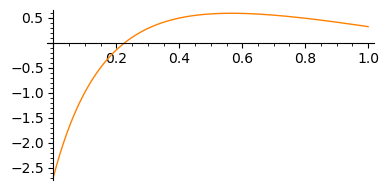

In [63]:
show(plot(Pi_1_m, 0, 1, figsize=[4,2], color=(1,.5,0) ) )

In [64]:
Pi_2_1 = Pi_2_a.subs(pi_h == 1, pi_l == pi_1_s, gamma == 0.4, w_2 == 0.5, beta == 1.5)
Pi_2_s = Pi_2_a.subs(pi_h == pi_h_s, pi_l == pi_l_s, gamma == 0.4, w_2 == 0.5, beta == 1.5)
Pi_2_2 = Pi_2_a.subs(pi_h == 0, pi_l == pi_2_s, gamma == 0.4, w_2 == 0.5, beta == 1.5)
Pi_2_m = max_symbolic(Pi_2_1, min_symbolic(Pi_2_s, Pi_2_2))

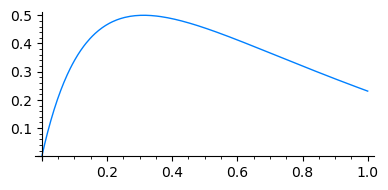

In [65]:
show(plot(Pi_2_m, 0, 1, figsize=[4,2], color=(0,.5,1) ) )

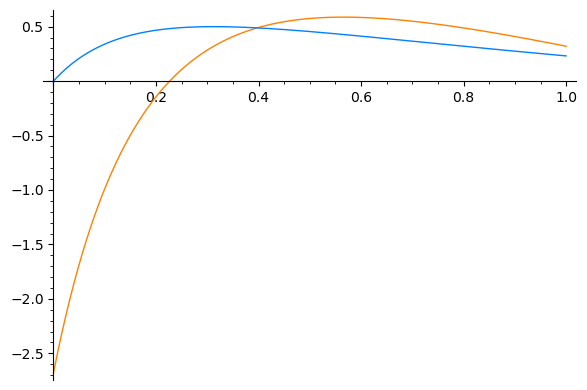

In [66]:
Prof_1_plot = (plot(Pi_1_m, 0, 1, figsize=[6,4], color=(1,.5,0) ) )
Prof_2_plot = (plot(Pi_2_m, 0, 1, figsize=[6,4], color=(0,.5,1) ) )
show(Prof_1_plot + Prof_2_plot)

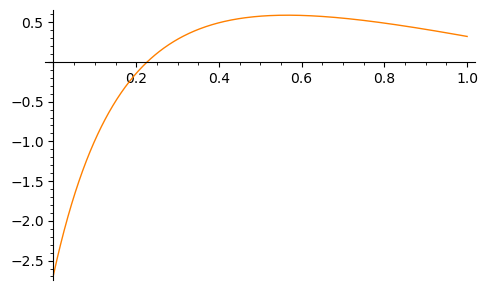

In [67]:
Profit_High = piecewise( [ [(0,0.4),Pi_1_2], [(0.4,0.625),Pi_1_s], [(0.625,1),Pi_1_1] ] )
show( plot( Profit_High, 0, 1, figsize=[5,3], color=(1,.5,0) ) )

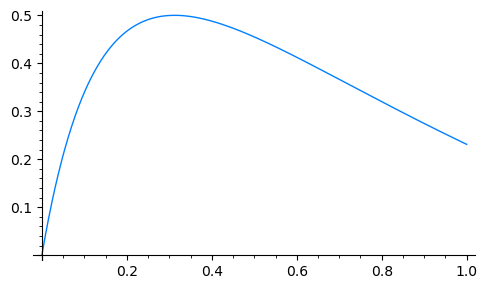

In [68]:
Profit_Low = piecewise( [ [(0,0.4),Pi_2_2], [(0.4,0.625),Pi_2_s], [(0.625,1),Pi_2_1] ] )
show( plot( Profit_Low, 0, 1, figsize=[5,3], color=(0,.5,1) ) )

In [69]:
max_1 = find_local_maximum(Pi_1_m,0,1)
max_1

(0.5874329172380719, 0.5657991571110855)

In [70]:
max_2 = find_local_maximum(Pi_2_m,0,1)
max_2

(0.49999999999999994, 0.312500001574188)

In [71]:
max_1_a = max_1[0]
max_1_a

0.5874329172380719

In [72]:
max_1_b = max_1[1]
max_1_b

0.5657991571110855

In [73]:
max_2_a = max_2[0]
max_2_a

0.49999999999999994

In [74]:
max_2_b = max_2[1]
max_2_b

0.312500001574188

At $max_{1a}$, the wage falls within scenario **B**, so we can calculate firm 1's expected profit of offering $w_1 = max_{1a}$ using our profit function for scenario B.

In [75]:
Pi_max_1_a = Pi_1_s.subs(w_1 = max_1_a)
Pi_max_1_a

0.586274212602211

In [76]:
Pi_max_1_b = Pi_1_s.subs(w_1 = max_1_b)
Pi_max_1_b

0.587432917238072

In [77]:
Pi_max_2_a = Pi_2_s.subs(w_1 = max_2_a)
Pi_max_2_a

0.455000000000000

In [78]:
Pi_max_2_b = Pi_1_2.subs(w_1 = max_2_b)
Pi_max_2_b

0.320000004262417

So at these arbitrary values, each player would behave as follows:\
Firm 1 sets wage as $w_1 = max_{1a}$, high type workers would apply to firm 1 with probability $\pi_h$ and low type workers would apply to firm 1 with probability $\pi_l$.

This is not a full solution however, as both firms would set their wages to maximize their profits, rather than $w_2$ being fixed.\
Having done this visualization, we now approach the firms' problems again, allow each wage to be set by its respective firm.

We still fix $\lambda = 0.4$ and $\beta = 1.5$.

In [79]:
Pi_1 = Prob_1_h_simp*(beta - w_1) + Prob_1_l_simp*(1-w_1)
show(Pi_1)

-(gamma*pi_h - 2)*(beta - w_1)*gamma*pi_h - (2*gamma*pi_h - (gamma - 1)*pi_l - 2)*(gamma - 1)*pi_l*(w_1 - 1)

In [80]:
Pi_2 = Prob_2_h_simp*(beta - w_2) + Prob_2_l_simp*(1-w_2)
show(Pi_2)

-(gamma*(pi_h - 1) + 2)*(beta - w_2)*gamma*(pi_h - 1) - (2*gamma*pi_h - (gamma - 1)*(pi_l + 1))*(gamma - 1)*(pi_l - 1)*(w_2 - 1)

In [81]:
Pi_1_A = Pi_1.subs(pi_h == 1, pi_l == pi_1_s)
Pi_1_sA = Pi_1_A.subs(gamma == 0.4, beta == 1.5)
Pi_1_B = Pi_1.subs(pi_h == pi_h_s, pi_l == pi_l_s)
Pi_1_sB = Pi_1_B.subs(gamma == 0.4, beta == 1.5)
Pi_1_C = Pi_1.subs(pi_h == 0, pi_l == pi_2_s)
Pi_1_sC = Pi_1_C.subs(gamma == 0.4, beta == 1.5)

In [82]:
Pi_2_A = Pi_2.subs(pi_h == 1, pi_l == pi_1_s)
Pi_2_sA = Pi_2_A.subs(gamma == 0.4, beta == 1.5)
Pi_2_B = Pi_2.subs(pi_h == pi_h_s, pi_l == pi_l_s)
Pi_2_sB = Pi_2_B.subs(gamma == 0.4, beta == 1.5)
Pi_2_C = Pi_2.subs(pi_h == 0, pi_l == pi_2_s)
Pi_2_sC = Pi_2_C.subs(gamma == 0.4, beta == 1.5)

So we can now write out the complete expected profit functions for each firm, dependent on $w_1$ and $w_2$:

**firm 1:**\
$\begin{equation}
  \Pi_1(w_1, w_2)=\left\{
  \begin{array}{@{}ll@{}}
    \Pi_1(A) & \text{if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2\\
    \Pi_1(B) & \text{if } w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \text{ or } w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1\\
    \Pi_1(C) & \text{if } w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
  \end{array}\right.
\end{equation}$

**firm 2:**\
$\begin{equation}
  \Pi_2(w_1, w_2)=\left\{
  \begin{array}{@{}ll@{}}
    \Pi_2(A) & \text{if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2\\
    \Pi_2(B) & \text{if } w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \text{ or } w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1\\
    \Pi_2(C) & \text{if } w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
  \end{array}\right.
\end{equation}$

In [83]:
strat_h_a = strat_h.subs(gamma == 0.4)
Strategy_h = max_symbolic(0, min_symbolic(strat_h_a, 1))
Strategy_h

max(0, min((2*w_1 - 1.60000000000000*w_2)/(0.400000000000000*w_1 + 0.400000000000000*w_2), 1))

In [84]:
strats_l_s = pi_l_s.subs(gamma == 0.4)
strats_l_1 = pi_1_s.subs(gamma == 0.4)
strats_l_2 = pi_2_s.subs(gamma == 0.4)
Strategy_l = max_symbolic(strats_l_1, min_symbolic(strats_l_s, strats_l_2))
Strategy_l

max((-1.20000000000000*w_1 + 1.40000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), min((2*w_1 - 2.60000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), -(2*w_1 - 0.600000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2)))

In [85]:
Pi_1_final = Pi_1.subs(pi_h == Strategy_h, pi_l == Strategy_l, gamma == 0.4, beta == 1.5)
Pi_1_final

0.400000000000000*(w_1 - 1.50000000000000)*(0.400000000000000*max(0, min((2*w_1 - 1.60000000000000*w_2)/(0.400000000000000*w_1 + 0.400000000000000*w_2), 1)) - 2)*max(0, min((2*w_1 - 1.60000000000000*w_2)/(0.400000000000000*w_1 + 0.400000000000000*w_2), 1)) + 0.600000000000000*(w_1 - 1)*(0.800000000000000*max(0, min((2*w_1 - 1.60000000000000*w_2)/(0.400000000000000*w_1 + 0.400000000000000*w_2), 1)) + 0.600000000000000*max((-1.20000000000000*w_1 + 1.40000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), min((2*w_1 - 2.60000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), -(2*w_1 - 0.600000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2))) - 2)*max((-1.20000000000000*w_1 + 1.40000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), min((2*w_1 - 2.60000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), -(2*w_1 - 0.600000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2)))

In [86]:
Pi_2_final = Pi_2.subs(pi_h == Strategy_h, pi_l == Strategy_l, gamma == 0.4, beta == 1.5)
Pi_2_final

0.400000000000000*(w_2 - 1.50000000000000)*(max(0, min((2*w_1 - 1.60000000000000*w_2)/(0.400000000000000*w_1 + 0.400000000000000*w_2), 1)) - 1)*(0.400000000000000*max(0, min((2*w_1 - 1.60000000000000*w_2)/(0.400000000000000*w_1 + 0.400000000000000*w_2), 1)) + 1.60000000000000) + 0.600000000000000*(w_2 - 1)*(0.800000000000000*max(0, min((2*w_1 - 1.60000000000000*w_2)/(0.400000000000000*w_1 + 0.400000000000000*w_2), 1)) + 0.600000000000000*max((-1.20000000000000*w_1 + 1.40000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), min((2*w_1 - 2.60000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), -(2*w_1 - 0.600000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2))) + 0.600000000000000)*(max((-1.20000000000000*w_1 + 1.40000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), min((2*w_1 - 2.60000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2), -(2*w_1 - 0.600000000000000*w_2)/(-0.600000000000000*w_1 - 0.600000000000000*w_2

In [87]:
dev_Pi_1 = derivative(Pi_1_final, w_1)
dev_1_sol = solve(dev_Pi_1 == 0, w_1)

In [93]:
dev_Pi_2 = derivative(Pi_2_final, w_2)
dev_2_sol = solve((dev_Pi_2 == 0, w_1 == dev_1_sol), w_2)
dev_2_sol

[]

In [89]:
2+2

4

In [90]:
solve((dev_Pi_1 == dev_Pi_2),(w_1, w_2))

[]

In [91]:
solve((dev_Pi_1 == 0, dev_Pi_2 == 0), (w_1, w_2))

RuntimeError: ECL says: Console interrupt.

## 